- Load the data and load all the libraries
- Data preparation and Transformation
  - Convert all text  into Lowercase
  - remove all special chars
  - remove stopwords
  - lemmatization and stemming
- Vectorization
  - TF-IDF vectorizer
- Machine Learning and Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
df=pd.read_csv("/content/spam.csv",encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df1=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

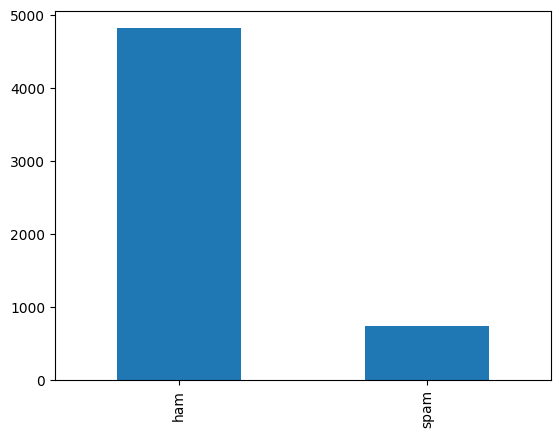

In [ ]:
df1['v1'].value_counts().plot(kind='bar')

In [ ]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence,)
    rem_url=re.sub(r'http\S+', '',cleantext,)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df1['v2']=df1['v2'].map(lambda s:preprocess(s))

In [ ]:
df1['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [ ]:
vec=TfidfVectorizer()

In [ ]:
x=vec.fit_transform(df1['v2'])

In [ ]:
x=x.toarray()

In [ ]:
type(x)

numpy.ndarray

In [ ]:
le=LabelEncoder()
y=le.fit_transform(df1['v1'])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


In [ ]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
rf=RandomForestClassifier()
clf=RandomizedSearchCV(rf,random_grid,random_state=123,verbose=2)
search=clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   5.8s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   4.3s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   3.9s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   4.7s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   4.7s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=   5.8s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=   6.8s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=  

In [ ]:
clf.best_params_

{'n_estimators': 230,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'criterion': 'gini'}

In [ ]:
rf=RandomForestClassifier(n_estimators=230,
 min_samples_split=10,
 min_samples_leaf= 1,
 max_depth=70,
 criterion= 'gini')
rf.fit(xtrain,ytrain)
rf_train=rf.predict(xtrain)
rf_test=rf.predict(xtest)
print('train score',round(accuracy_score(ytrain,rf_train),2))
print('test score',round(accuracy_score(ytest,rf_test),2))

train score 0.99
test score 0.98


In [ ]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
nb_preds_train = nb.predict(xtrain)
nb_preds_test = nb.predict(xtest)

In [ ]:
print('train score',round(accuracy_score(ytrain,nb_preds_train),2))
print('test score',round(accuracy_score(ytest,nb_preds_test),2))

train score 0.93
test score 0.88


In [ ]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
mnb_preds_train = nb.predict(xtrain)
mnb_preds_test = nb.predict(xtest)

In [ ]:
print('train score',round(accuracy_score(ytrain,mnb_preds_train),2))
print('test score',round(accuracy_score(ytest,mnb_preds_test),2))

train score 0.98
test score 0.97


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
pipe=pipeline("text-classification", model="zhuolisam/spam-classifier")

In [ ]:
preds=pipe(str(df1['v2'][5571]))

In [ ]:
print(preds)

[{'label': 'HAM', 'score': 0.9987010955810547}]
